# Imports and constants

In [560]:
%reset -f

In [561]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge, ElasticNet

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, log_loss, mean_squared_error, r2_score

# Load data and explore columns

In [562]:
df_basketball = pd.read_csv('basketball_performance.csv')
df_basketball

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [563]:
df_basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1340 non-null   int64  
 1   Name               1340 non-null   object 
 2   GamesPlayed        1340 non-null   int64  
 3   MinutesPlayed      1340 non-null   float64
 4   PointsPerGame      1340 non-null   float64
 5   FieldGoalsMade     1340 non-null   float64
 6   FieldGoalsAttempt  1340 non-null   float64
 7   FieldGoalPercent   1340 non-null   float64
 8   3PointMade         1340 non-null   float64
 9   3PointAttempt      1340 non-null   float64
 10  3PointPercent      1329 non-null   float64
 11  FreeThrowMade      1340 non-null   float64
 12  FreeThrowAttempt   1340 non-null   float64
 13  FreeThrowPercent   1340 non-null   float64
 14  OffensiveRebounds  1340 non-null   float64
 15  DefensiveRebounds  1340 non-null   float64
 16  Rebounds           1340 

There are only numerical columns and the name of the player column. Also there 1340 rows, so that is not much data.

In [564]:
df_basketball.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1340.0,669.500000,386.968991,0.0,334.750,669.50,1004.25,1339.0
GamesPlayed,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.00,82.0
MinutesPlayed,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.90,40.9
PointsPerGame,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.80,28.2
FieldGoalsMade,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.40,10.2
FieldGoalsAttempt,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.50,19.8
FieldGoalPercent,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.90,73.7
3PointMade,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.40,2.3
3PointAttempt,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.20,6.5
3PointPercent,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.50,100.0


Most columns would suggest the skill level of a player. An exception of that would be - `GamesPlayed` and `MinutesPlayed`. 

The former shows the average player plays 60 games. And for the latter we can see that range of the data is 3.1 - 40.9 minutes played.

In [565]:
df_basketball.isna().sum()

Unnamed: 0            0
Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
dtype: int64

Almost all values are filled, only `3PointPercent` have 11 missing values.

In [566]:
df_basketball[df_basketball["3PointPercent"].isna()]

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
338,338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
339,339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
340,340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,...,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4
358,358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,...,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5
386,386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,...,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2
397,397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,...,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4
507,507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,...,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1
509,509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,...,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9
510,510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,...,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8
521,521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,...,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7


We can see the data is missing because they have not made any attempts (`3PointAttempt`). It is appropriate to fill the data with 0.

# Prepare data for visualization

In [567]:
df_basketball = df_basketball.fillna(0)
df_basketball.isna().sum()

Unnamed: 0           0
Name                 0
GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
3PointMade           0
3PointAttempt        0
3PointPercent        0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
dtype: int64

To decrease the number of columns (so it is easier to analyse the data), we would remove the ones that can be calculated from the others - e.g. `FieldGoalsMade`. We choose to remove the successful attempt number and not the total number or percantage as it gives least information on its own.

We won't remove any of the rebounds count without more exploration first.

In [568]:
df_basketball = df_basketball.drop(['FieldGoalsMade', '3PointMade', 'FreeThrowMade'], axis=1)
df_basketball

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsAttempt,FieldGoalPercent,3PointAttempt,3PointPercent,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,Brandon Ingram,36,27.4,7.4,7.6,34.7,2.1,25.0,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,Andrew Harrison,35,26.9,7.2,6.7,29.6,2.8,23.5,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,JaKarr Sampson,74,15.3,5.2,4.7,42.2,1.7,24.4,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,Malik Sealy,58,11.6,5.7,5.5,42.6,0.5,22.6,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,Matt Geiger,48,11.5,4.5,3.0,52.4,0.1,0.0,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,3.6,43.3,0.2,14.3,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,1336,Brent Price,68,12.6,3.9,4.1,35.8,0.7,16.7,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,1337,Marlon Maxey,43,12.1,5.4,3.9,55.0,0.0,0.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,1338,Litterial Green,52,12.0,4.5,3.8,43.9,0.2,10.0,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


Let's also remove `Unnamed: 0` as it is the index and `Name` as it won't help with our prediction

In [569]:
df_basketball = df_basketball.drop(['Unnamed: 0', 'Name'], axis=1)
df_basketball

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsAttempt,FieldGoalPercent,3PointAttempt,3PointPercent,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,7.6,34.7,2.1,25.0,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,6.7,29.6,2.8,23.5,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,4.7,42.2,1.7,24.4,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,5.5,42.6,0.5,22.6,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,3.0,52.4,0.1,0.0,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,3.6,43.3,0.2,14.3,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,4.1,35.8,0.7,16.7,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,3.9,55.0,0.0,0.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,3.8,43.9,0.2,10.0,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


We succesfully reduced the columns from 21 to 15

In [570]:
df_basketball.columns

Index(['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsAttempt',
       'FieldGoalPercent', '3PointAttempt', '3PointPercent',
       'FreeThrowAttempt', 'FreeThrowPercent', 'OffensiveRebounds',
       'DefensiveRebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers'],
      dtype='object')

# Visualize data

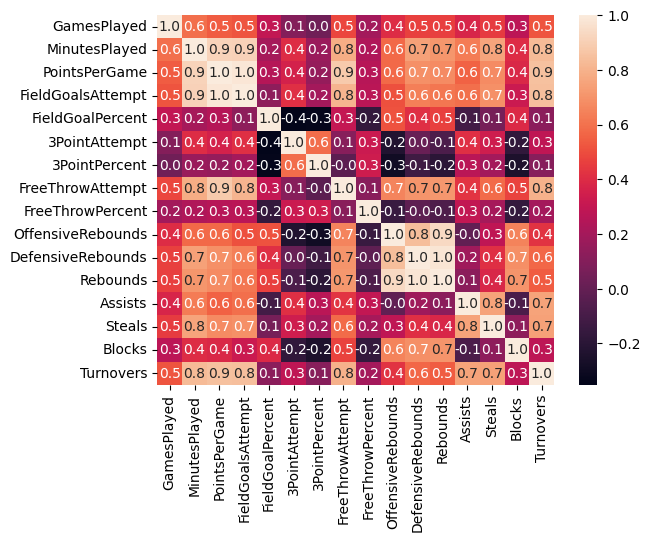

In [571]:
sns.heatmap(df_basketball.corr(), annot=True, fmt= '.1f');

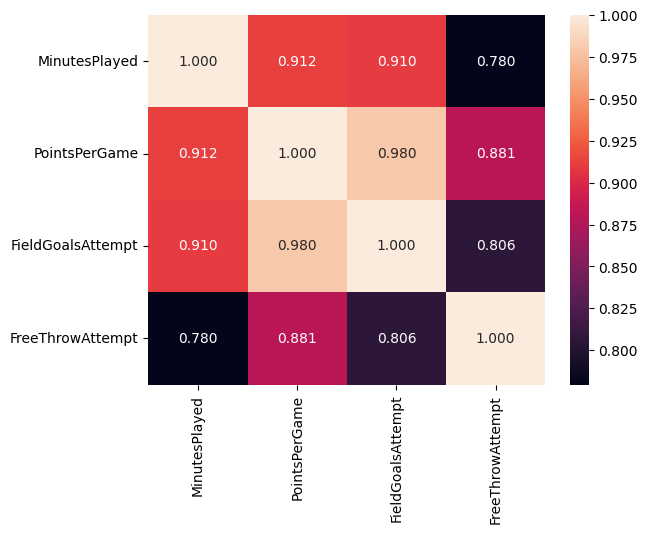

In [572]:
sns.heatmap(df_basketball[['MinutesPlayed', 'PointsPerGame', 'FieldGoalsAttempt', 'FreeThrowAttempt']].corr(), annot=True, fmt= '.3f');

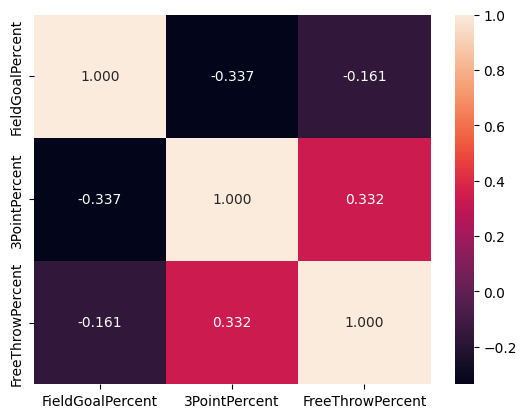

In [573]:
sns.heatmap(df_basketball[['FieldGoalPercent', '3PointPercent', 'FreeThrowPercent']].corr(), annot=True, fmt= '.3f');

It seems `MinutesPlayed`, `FieldGoalsMade` and `FieldGoalsAttempt` have over 90% correlation between with each other. 

Also, it is interesting that the `FieldGoalPercent` is negatevely correlated with `3PointPercent`.

GamesPlayed
11      2
12      2
14      1
15      3
16      1
     ... 
78     41
79     50
80     56
81     58
82    115
Name: count, Length: 70, dtype: int64


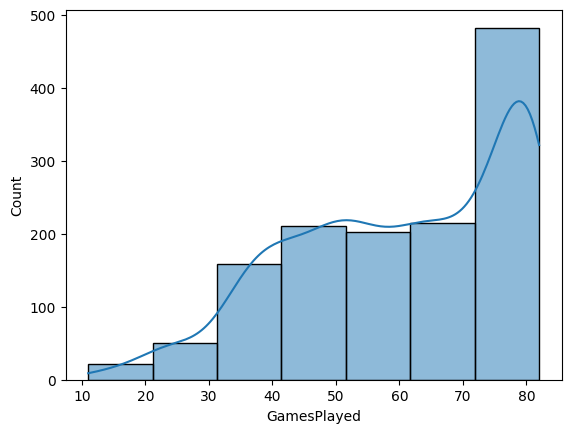

In [574]:
print(df_basketball['GamesPlayed'].value_counts().sort_index())
sns.histplot(df_basketball, x='GamesPlayed', binwidth=10, kde=True);

A big fraction of the players have played more than 70 games. And less than 10% have played less than 30 games.

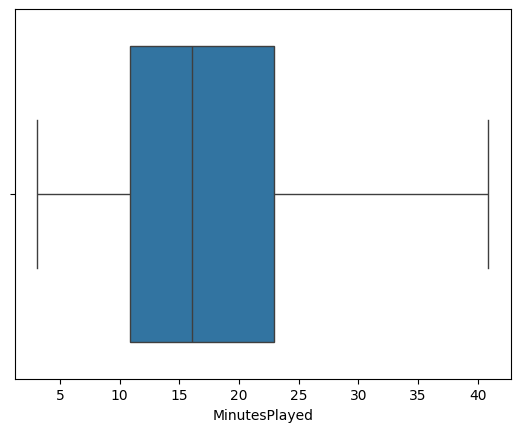

In [575]:
sns.boxplot(df_basketball, x='MinutesPlayed');

Nevertheless, most players have played between 10 and 24 minutes. The most minutes a player has played is a little over 40 minutes.

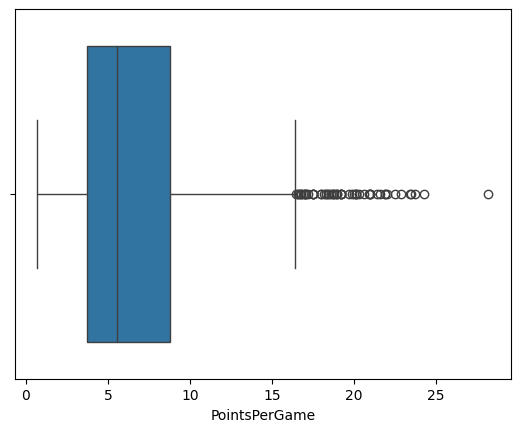

In [576]:
sns.boxplot(df_basketball, x='PointsPerGame');

The average player scores between 4 and 9 points per game. There are more than expected outliers values where more points are scored.

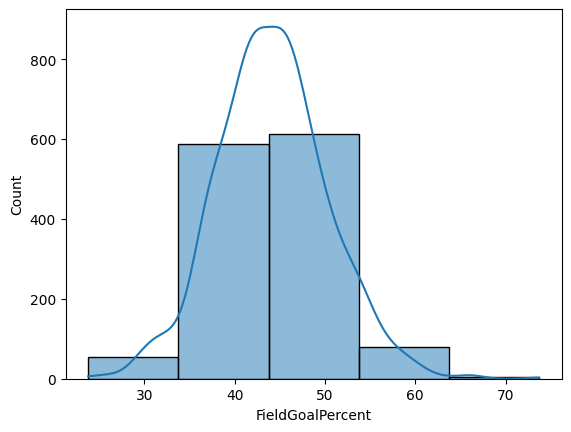

In [577]:
sns.histplot(df_basketball, x='FieldGoalPercent', binwidth=10, kde=True);

451


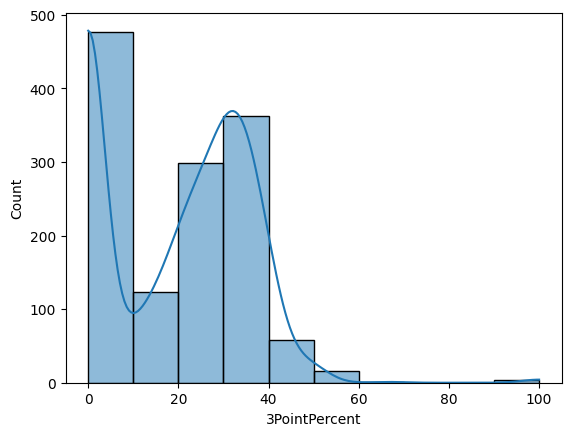

In [578]:
print(df_basketball[df_basketball['3PointPercent'] == 0].shape[0])
sns.histplot(df_basketball, x='3PointPercent', binwidth=10, kde=True);

People who haven't tried to earn 3 points: 360
People who haven't succeded in earning 3 points: 451


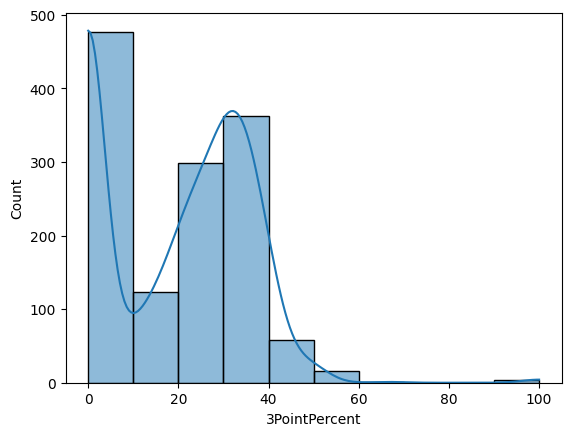

In [579]:
print(f"People who haven't tried to earn 3 points: {df_basketball[df_basketball['3PointAttempt'] == 0].shape[0]}")
print(f"People who haven't succeded in earning 3 points: {df_basketball[df_basketball['3PointPercent'] == 0].shape[0]}")
sns.histplot(df_basketball, x='3PointPercent', binwidth=10, kde=True);

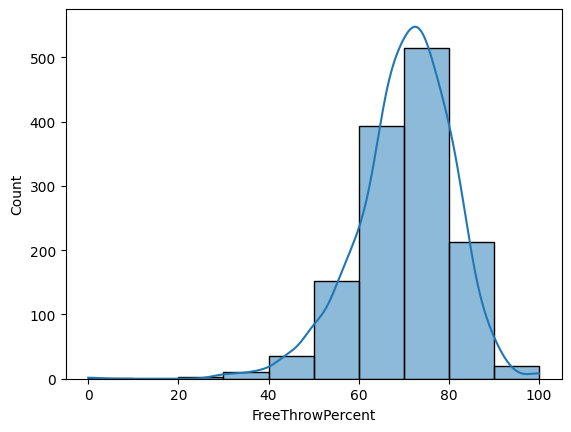

In [580]:
sns.histplot(df_basketball, x='FreeThrowPercent', binwidth=10, kde=True);

`FieldGoalPercent` - It is mostly between 40% - 60%.

`3PointPercent` - Around 1/4 players haven't tried in earning 3 points, and 1/3 haven't succeed in doing so. From the others people mostly have between 20% - 40% in success.

`FreeThrowPercent` - It is mostly between 60% - 80%.

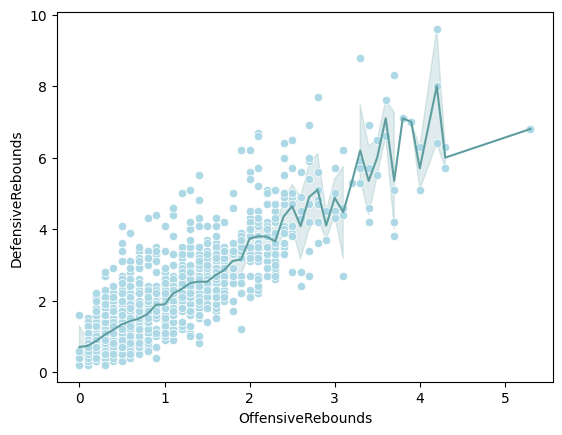

In [581]:
sns.lineplot(df_basketball, x='OffensiveRebounds', y='DefensiveRebounds', color='cadetblue');
sns.scatterplot(df_basketball, x='OffensiveRebounds', y='DefensiveRebounds', color='lightblue');

It seems we can easily do PCA without losing much data on `OffensiveRebounds` and `DefensiveRebounds`.

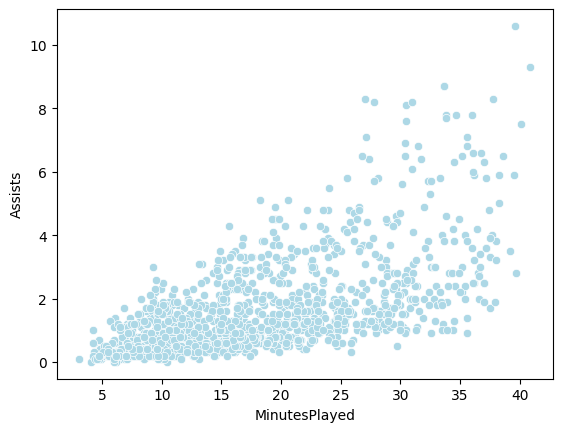

In [582]:
sns.scatterplot(df_basketball, x='MinutesPlayed', y='Assists', color='lightblue');

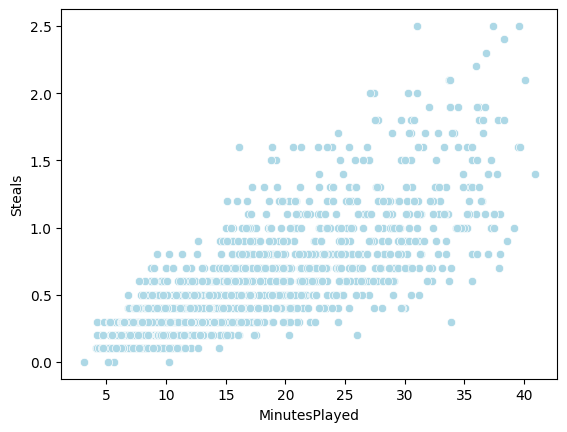

In [583]:
sns.scatterplot(df_basketball, x='MinutesPlayed', y='Steals', color='lightblue');

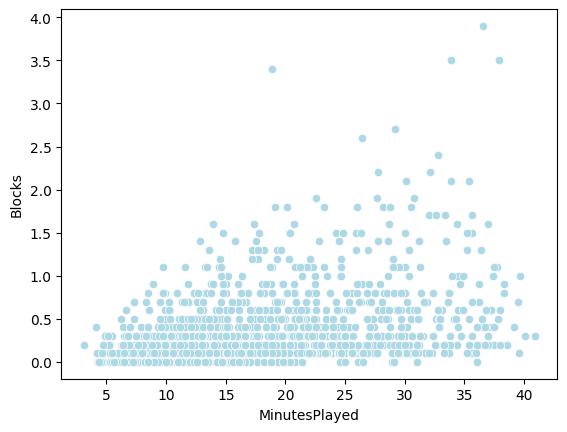

In [584]:
sns.scatterplot(df_basketball, x='MinutesPlayed', y='Blocks', color='lightblue');


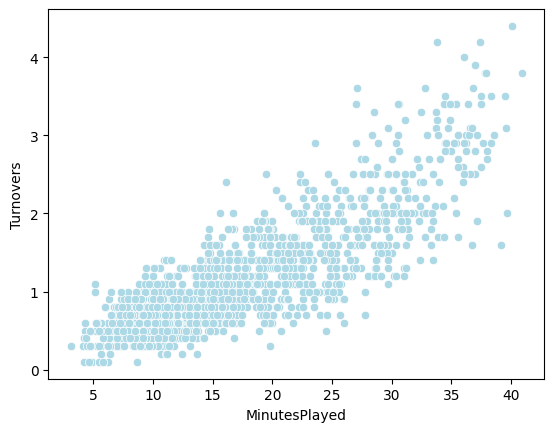

In [585]:
sns.scatterplot(df_basketball, x='MinutesPlayed', y='Turnovers', color='lightblue');


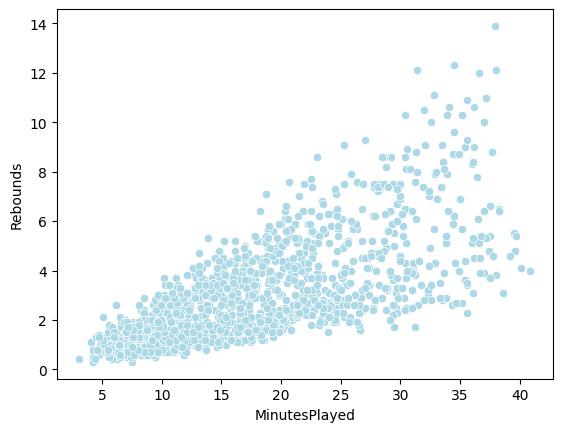

In [586]:
sns.scatterplot(df_basketball, x='MinutesPlayed', y='Rebounds', color='lightblue');

We can observe how `MinutesPlayed` is a good indicator for most columns that count number of attempts. Which was to be expected.

# Model

In [587]:
X = PCA(n_components=2).fit_transform(df_basketball)
X = pd.DataFrame(X, index=df_basketball.index, columns=[ f'PC {i}' for i in range(1, 2 + 1)])
X

,PC 1,PC 2
0,16.312916,14.370958
1,16.752010,16.056203
2,-10.908241,0.059176
3,3.822124,4.029795
4,18.661253,-15.183794
...,...,...
1335,-15.848769,-8.054613
1336,-4.852330,-0.580506
1337,22.894914,-14.931267
1338,13.965942,-7.035500


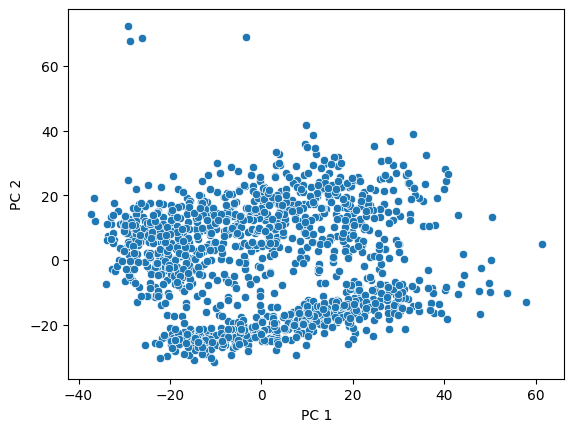

In [588]:
sns.scatterplot(X, x='PC 1', y='PC 2');

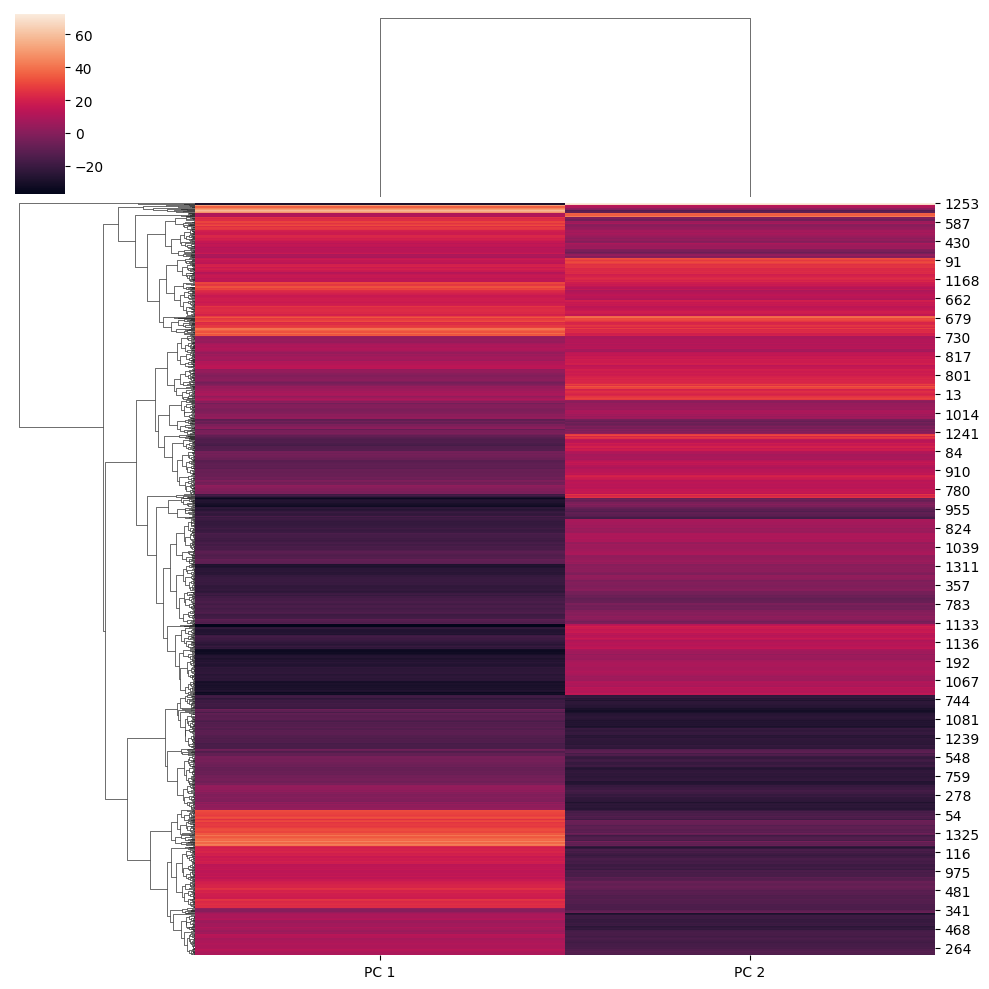

In [589]:
sns.clustermap(X)

We can spot the 2 clusters

In [590]:
X_scaled = StandardScaler().fit_transform(df_basketball)
X_scaled = PCA(n_components=2).fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, index=df_basketball.index, columns=[ f'PC {i}' for i in range(1, 2 + 1)])
X_scaled

,PC 1,PC 2
0,0.647586,-1.026529
1,1.024254,-2.881052
2,-0.875450,-0.597247
3,-1.312513,-0.228395
4,-1.497123,1.829389
...,...,...
1335,-1.173954,-0.744185
1336,-1.333006,-1.578532
1337,-0.864030,2.500228
1338,-2.123753,-0.218237


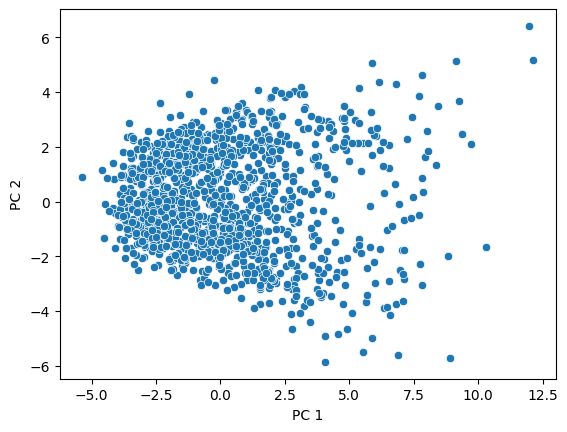

In [591]:
sns.scatterplot(X_scaled, x='PC 1', y='PC 2');

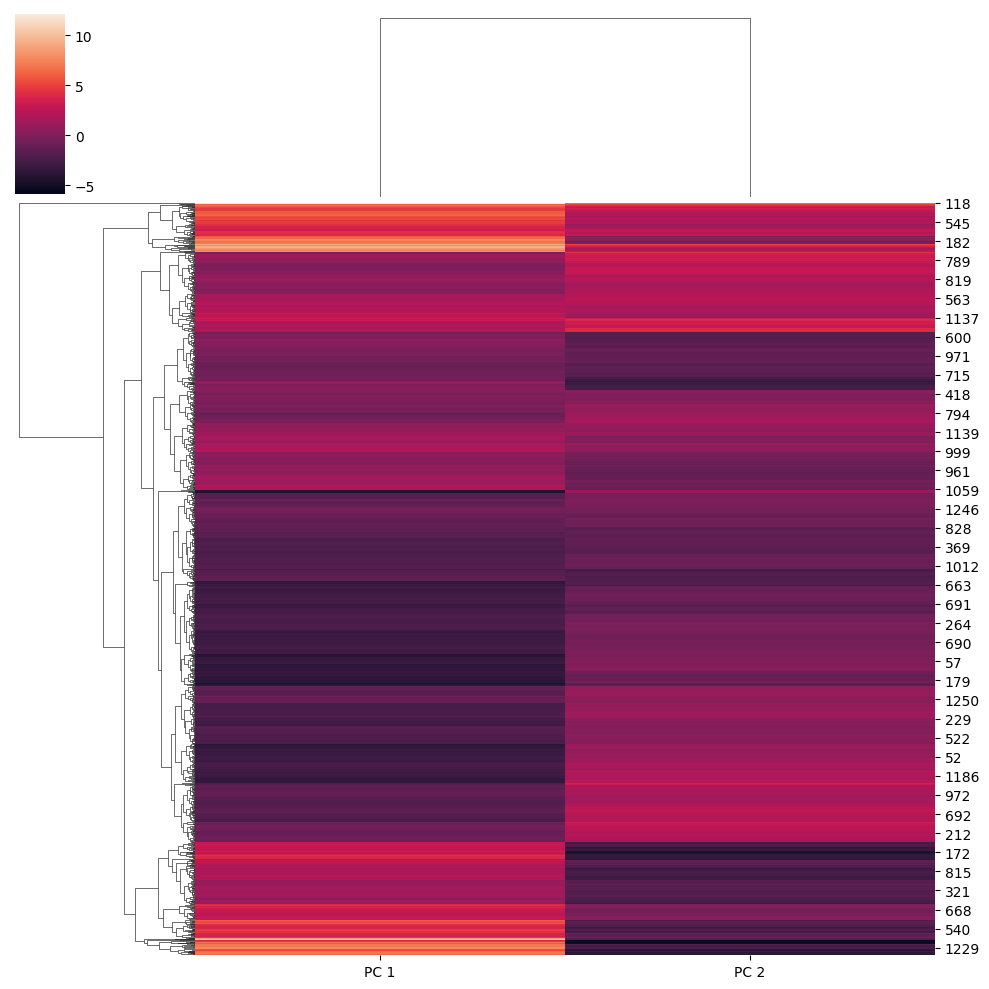

In [592]:
sns.clustermap(X_scaled)

It is harder to see if there are any clusters here.

### KMEANS

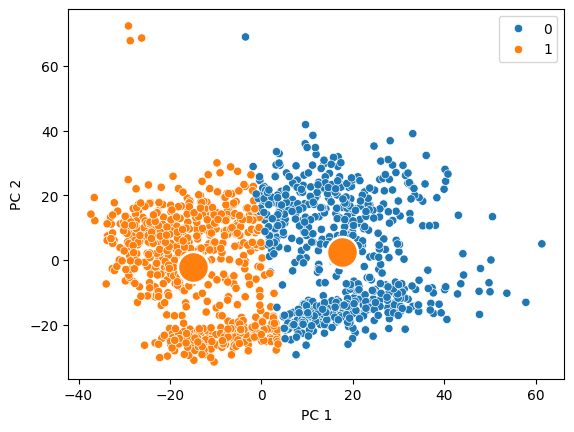

In [593]:
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=500);

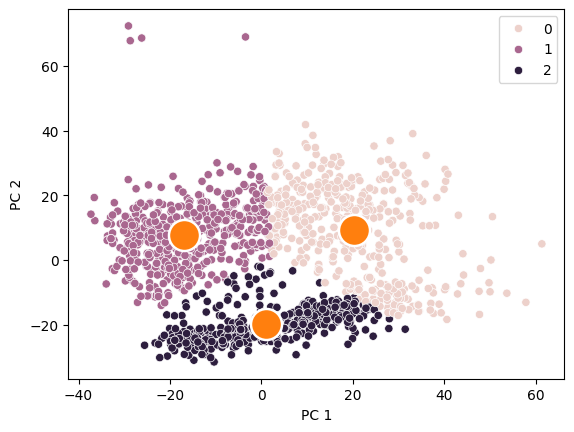

In [594]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=500);

With 2 clusters, it didn't do very well. 3 clusters were better.

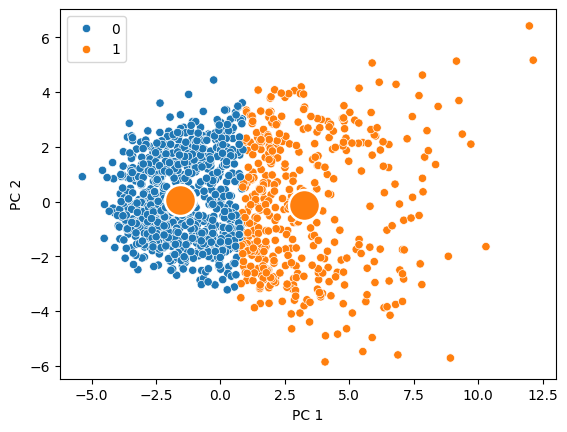

In [595]:
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=500);

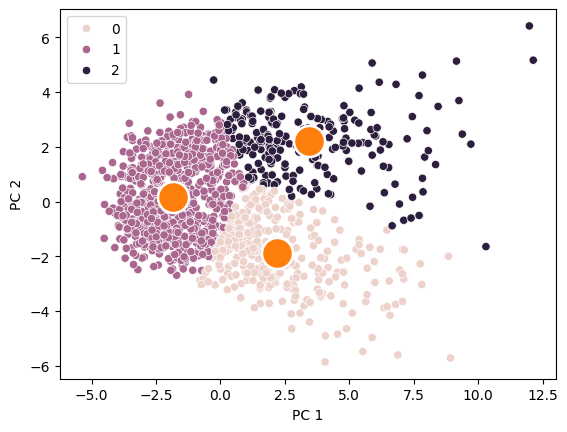

In [596]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=500);

Not the best splits.

### AgglomerativeClustering

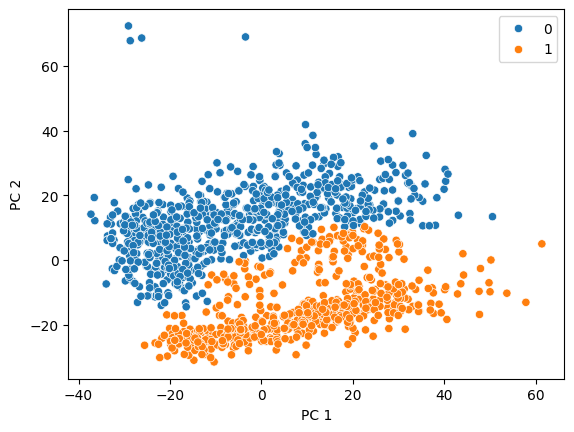

In [597]:
y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

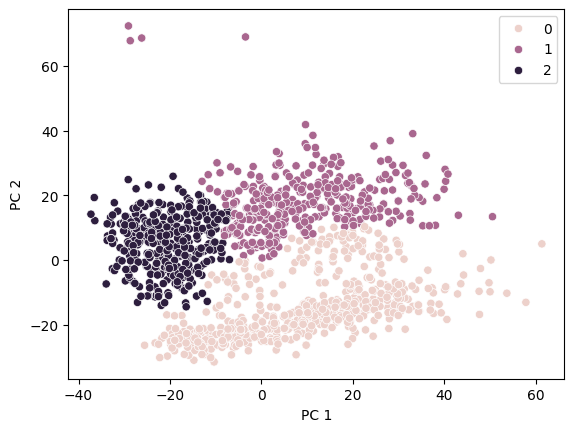

In [598]:
y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

This time 2 clusters did very well, 3 is relatevely as good as KMeans.

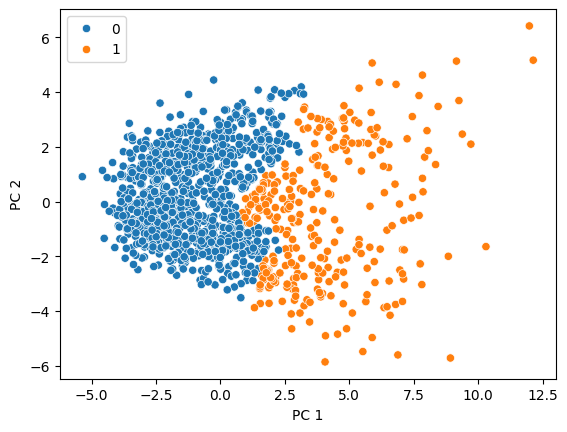

In [599]:
y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);

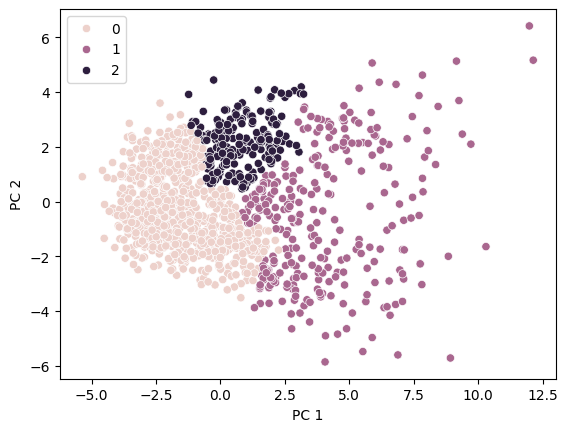

In [600]:
y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);

Seems like it seperates outliers and common values, so it won't give us much information for our players.

### DBSCAN

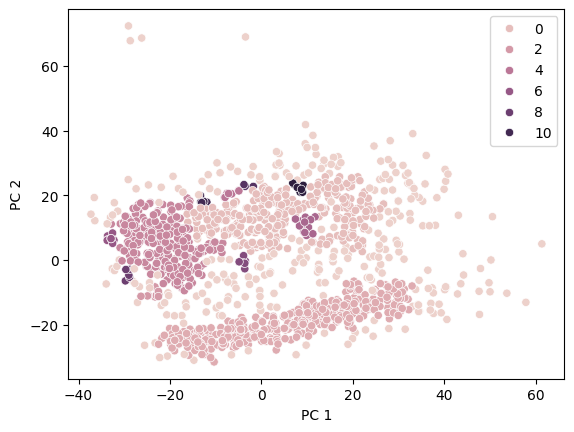

In [601]:
y_pred = DBSCAN(eps=2).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

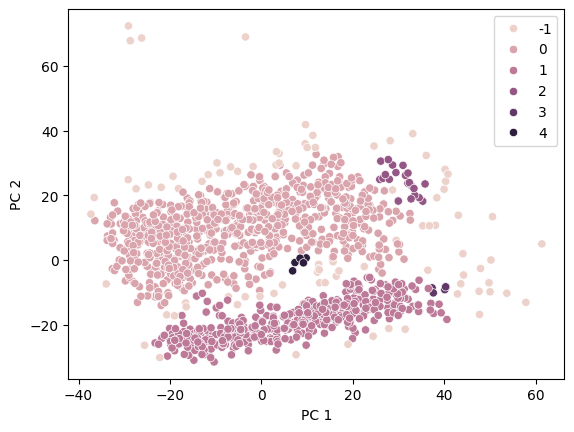

In [602]:
y_pred = DBSCAN(eps=3).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

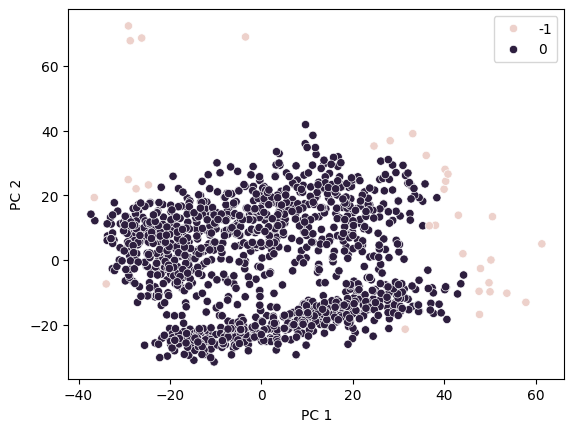

In [603]:
y_pred = DBSCAN(eps=4).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

We can observe that with epsilon 3, it has split the data most accurately.

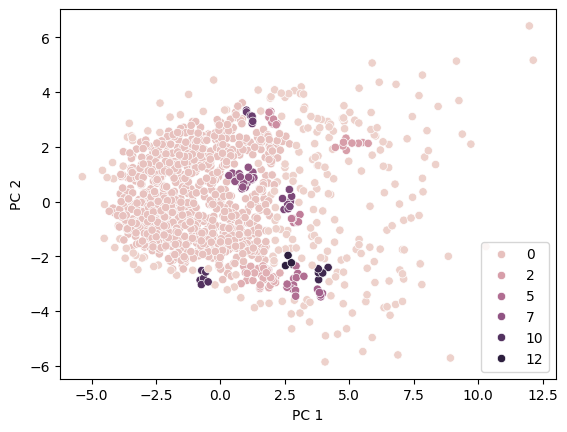

In [604]:
y_pred = DBSCAN(eps=0.3).fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);

It behaves like AgglomerativeClustering - separating outliers.

### HDBSCAN

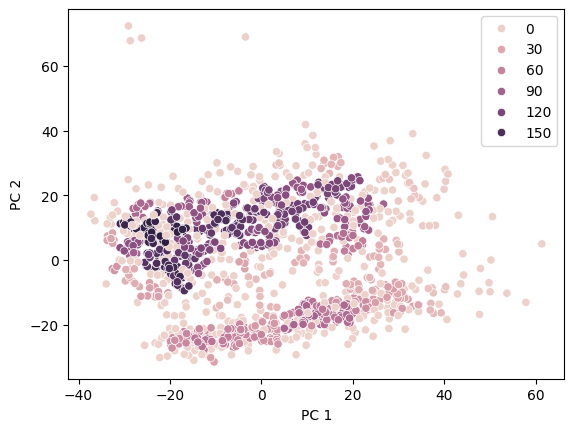

In [605]:
y_pred = HDBSCAN(min_cluster_size=3).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

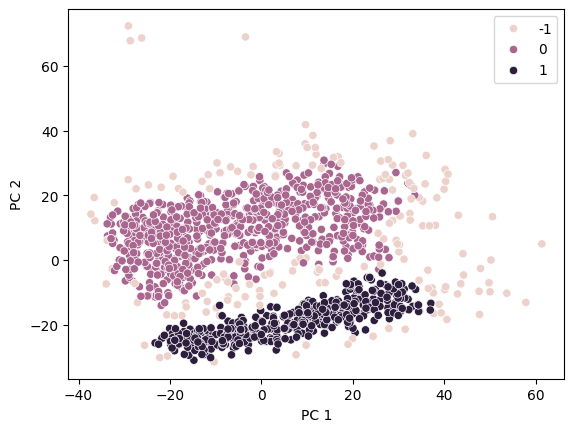

In [606]:
y_pred = HDBSCAN(min_cluster_size=10).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

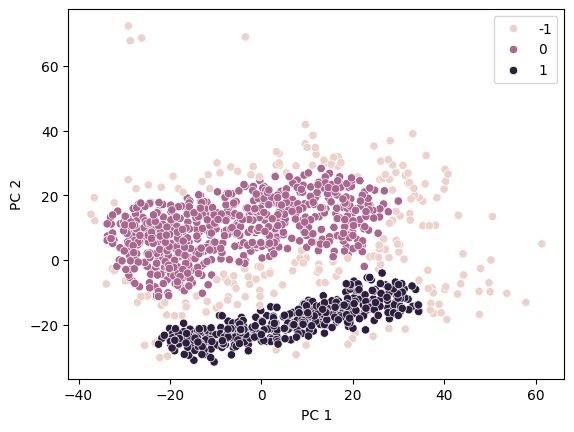

In [607]:
y_pred = HDBSCAN(min_cluster_size=30).fit_predict(X)
sns.scatterplot(x=X['PC 1'], y=X['PC 2'], hue=y_pred);

Seems the most optimal parameter is around 10. With smaller values the clusters are too splited. Whereas with bigger ones there is no change.

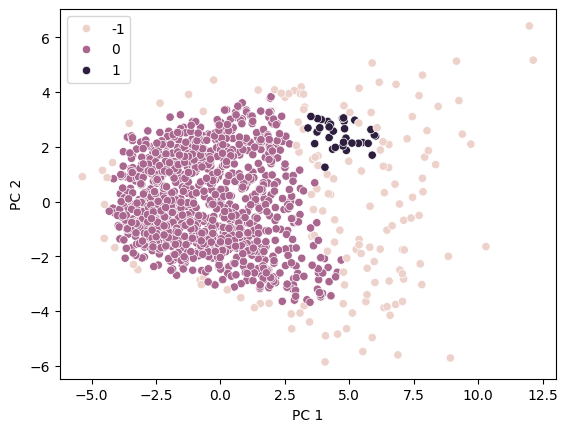

In [608]:
y_pred = HDBSCAN(min_cluster_size=10).fit_predict(X_scaled)
sns.scatterplot(x=X_scaled['PC 1'], y=X_scaled['PC 2'], hue=y_pred);

As expected none of the algorithms could find a good clustering, as it was also hard to find one with the human eye.

# Conclusion

We recived best results with AgglomerativeClustering on unscaled data. Let's label the findings now.

In [609]:
y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X)
y_pred = y_pred.astype(bool)
y_pred

array([False, False, False, ...,  True,  True, False])

In [610]:
df_basketball[y_pred].describe().T

,count,mean,std,min,25%,50%,75%,max
GamesPlayed,577.0,57.948007,16.229391,11.0,45.0,58.0,72.0,82.0
MinutesPlayed,577.0,15.059965,7.252512,3.1,9.6,13.3,19.3,37.9
PointsPerGame,577.0,5.569324,3.648931,0.7,3.2,4.6,6.8,24.3
FieldGoalsAttempt,577.0,4.650607,2.826193,0.8,2.8,3.9,5.6,18.7
FieldGoalPercent,577.0,46.714558,6.472712,23.8,42.9,46.9,50.9,73.7
3PointAttempt,577.0,0.100000,0.189755,0.0,0.0,0.0,0.1,1.9
3PointPercent,577.0,3.298614,6.787204,0.0,0.0,0.0,0.0,33.3
FreeThrowAttempt,577.0,1.706759,1.213154,0.0,0.9,1.4,2.2,10.2
FreeThrowPercent,577.0,65.320277,10.655710,0.0,59.5,66.7,72.2,90.5
OffensiveRebounds,577.0,1.213692,0.812000,0.0,0.6,1.0,1.6,5.3


In [611]:
df_basketball[~y_pred].describe().T

,count,mean,std,min,25%,50%,75%,max
GamesPlayed,763.0,62.279161,18.080584,11.0,49.00,66.0,79.00,82.0
MinutesPlayed,763.0,19.564089,8.531136,4.1,12.45,18.4,25.55,40.9
PointsPerGame,763.0,7.733290,4.613320,1.2,4.10,6.6,10.10,28.2
FieldGoalsAttempt,763.0,6.819004,3.824427,1.0,3.90,5.9,8.70,19.8
FieldGoalPercent,763.0,42.244692,5.090425,25.0,39.10,42.3,45.50,60.8
3PointAttempt,763.0,1.292792,1.157862,0.0,0.30,1.0,2.00,6.5
3PointPercent,763.0,31.136566,9.155177,7.1,25.20,31.4,36.00,100.0
FreeThrowAttempt,763.0,1.909043,1.394810,0.1,0.90,1.5,2.40,9.1
FreeThrowPercent,763.0,74.066317,8.822158,37.1,69.20,74.6,80.00,100.0
OffensiveRebounds,763.0,0.854915,0.712256,0.0,0.30,0.6,1.10,4.2


In [612]:
df_combined = pd.DataFrame(data=[df_basketball[~y_pred].mean(), df_basketball[y_pred].mean()])
df_combined["Category"] = ["First", "Second"]
df_combined = df_combined.melt(id_vars = "Category")
df_combined

,Category,variable,value
0,First,GamesPlayed,62.279161
1,Second,GamesPlayed,57.948007
2,First,MinutesPlayed,19.564089
3,Second,MinutesPlayed,15.059965
4,First,PointsPerGame,7.733290
5,Second,PointsPerGame,5.569324
6,First,FieldGoalsAttempt,6.819004
7,Second,FieldGoalsAttempt,4.650607
8,First,FieldGoalPercent,42.244692
9,Second,FieldGoalPercent,46.714558


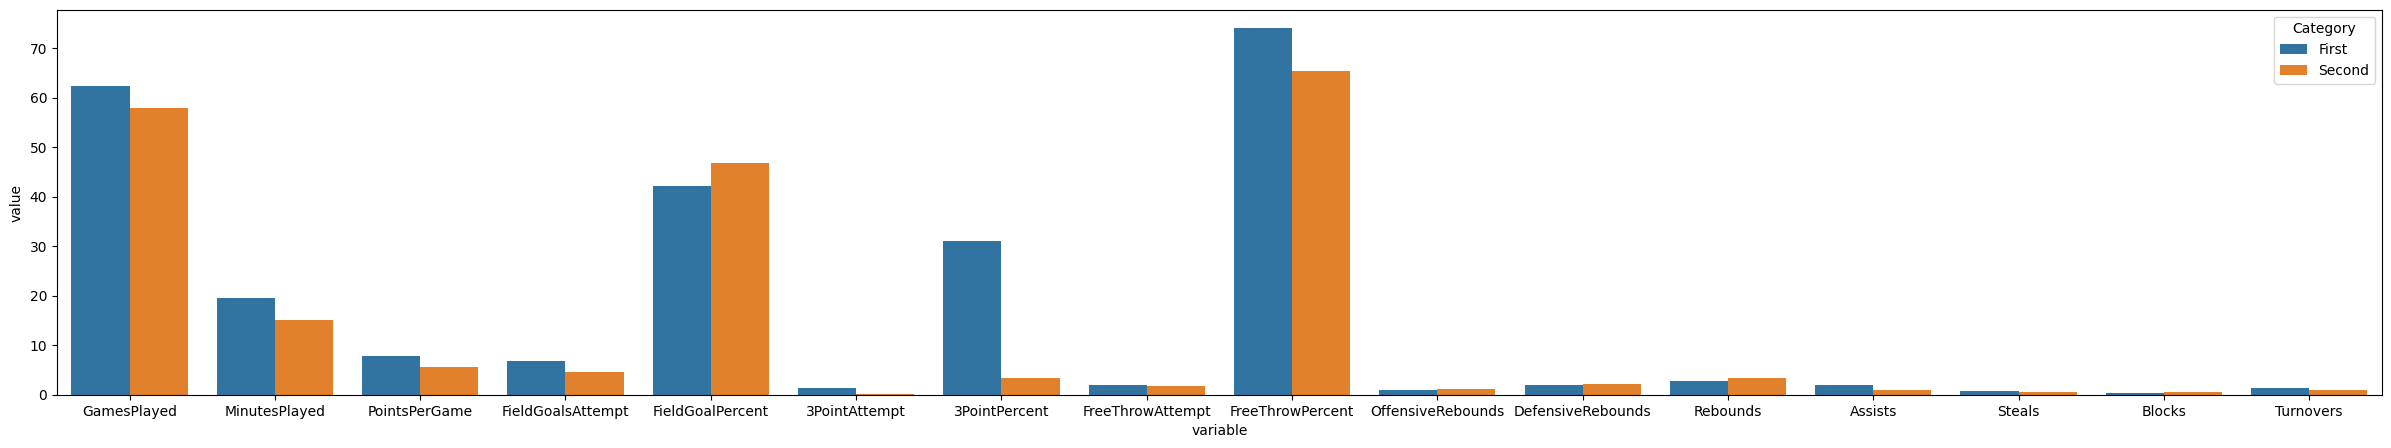

In [613]:
plt.subplots(figsize=(30, 5))
sns.barplot(df_combined, x='variable', y='value', hue='Category');

It seems the First Category is more likely to stay due to play more games, minutes, and having a better score in almost all categories. An interesting thing to note is that players that are scoring better for a single point, perform worse for most of the others ( excluding both rebounds and blocks. )